# Chicago taxi data 

## Clustering Algorithm
In this analysis, the DBSCAN and Hierarchical algorithms are chosen because I would like to see what the differences in terms of clustering result between them.  

## Pre-processing
The dataset represents each taxi-trip informatino which includes taxi's id, trip's distance, time, locatino, etc. To evaluate the clustering algorithms, only the the columns of coordinates are needed. Therefore, the pre-processing extracted two columns: ***Pickup Centroid Latitude*** and ***Pickup Centroid Longitude***. Also, we don't need any NA data so the rows containing N/A will be dropped.


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN


df = pd.read_csv('chicago_taxi.csv')
pickup_coordinates_df = df[['Pickup Centroid Latitude', 'Pickup Centroid Longitude']].dropna()

In [2]:
len(pickup_coordinates_df)

273071

## Sampling
This dataframe has 273071 rows, which quietly slows down processing. To spped up the process, I decided to take 30000 rows. To be fair, I used the [sampling method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html) from the Pandas.

In [7]:
# sampling data
sampled_df = pickup_coordinates_df.sample(30000)

## Normalization
Although the coordinates are presented in human-read format, I still want to normalize the latitude and longitude to give us a nicer perspective evaluating the result.

## DBSCAN
The first algorithm is DBSCAN, it needs two parameters: eps and min_sample. The *eps* is the radius for each data point when doing the clustering. And the min_sample is how many data points are at least counted into a group. 

In [8]:
X = sampled_df.to_numpy()
X = StandardScaler().fit_transform(X)
dbscan_clustering = DBSCAN(eps=0.4, min_samples=80).fit(X)

In [9]:
# How many groups in the clustering
np.unique(dbscan_clustering.labels_)

array([-1,  0,  1,  2,  3,  4])

## Output evaluation
The cell above shows how many groups the DBSCAN generated. It divided the dataset into 5 groups, and the -1 means outlier. We can visualize the result by the following figure. The purple points are all outliers, which is not what I want actually because I presumed there would not be too many outliers.

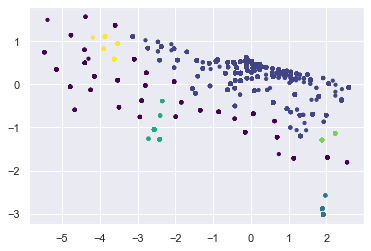

In [10]:
plt.scatter(X[:,0], X[:,1], c=dbscan_clustering.labels_, cmap='viridis', s=10)

## Hierarchical Clustering
The second algorithms is hierarchical. This time I can assign how many clusters I want. The n_clusters is set to 5 because I want have the similar result from the DBSCAN one. The affinity is set to euclidean because that is what DBSCAN's default is. 

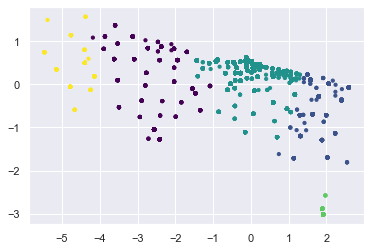

In [11]:
from sklearn.cluster import AgglomerativeClustering

hierarchical_clustering = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='average')
predicted_result = hierarchical_clustering.fit_predict(X)
plt.scatter(X[:,0], X[:,1], c=predicted_result, cmap='viridis', s=10)